In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv (r'..\train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [46]:
# Selecionar colunas numéricas para a PCA
# Para simplificar, vamos escolher algumas colunas numéricas
colunas = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'FullBath', 'TotRmsAbvGrd']
colunas

['OverallQual',
 'YearBuilt',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageArea',
 'FullBath',
 'TotRmsAbvGrd']

In [47]:
# Remover linhas com valores ausentes nas colunas selecionadas
df_limpo = df.dropna(subset=colunas)
df_limpo

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [48]:
# Extrair as colunas relevantes para a PCA
X = df_limpo[colunas].values
X

array([[   7, 2003,  856, ...,  548,    2,    8],
       [   6, 1976, 1262, ...,  460,    2,    6],
       [   7, 2001,  920, ...,  608,    2,    6],
       ...,
       [   7, 1941, 1152, ...,  252,    2,    9],
       [   5, 1950, 1078, ...,  240,    1,    5],
       [   5, 1965, 1256, ...,  276,    1,    6]], dtype=int64)

In [54]:
# Normalizar os dados
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

In [50]:
# Aplicar PCA
pca = PCA(n_components=2)
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

In [51]:
# Nomear os componentes principais
componente_principal_1 = X_pca[:, 0]
componente_principal_2 = X_pca[:, 1]

In [52]:
# Verificar a variância explicada pelos componentes principais
print(f'Variância explicada pelo Componente Principal 1: {pca.explained_variance_ratio_[0]:.2f}')
print(f'Variância explicada pelo Componente Principal 2: {pca.explained_variance_ratio_[1]:.2f}')

Variância explicada pelo Componente Principal 1: 0.54
Variância explicada pelo Componente Principal 2: 0.17


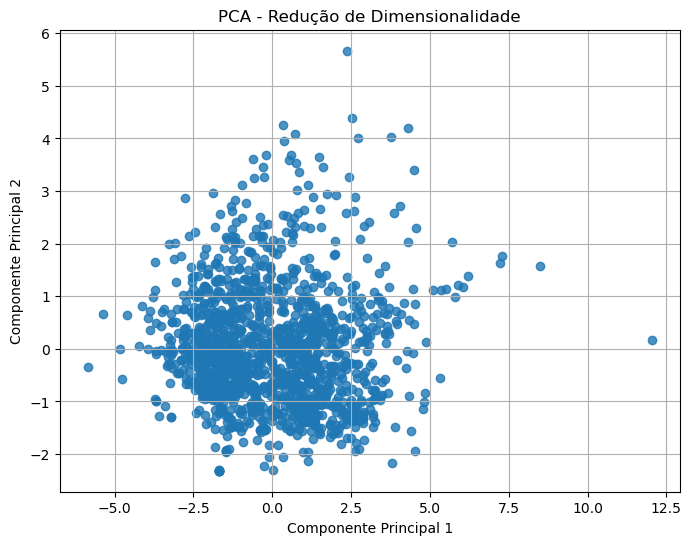

In [57]:
# Plotar os dois componentes principais
plt.figure(figsize=(8, 6))
plt.scatter(componente_principal_1, componente_principal_2, alpha=0.8)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Redução de Dimensionalidade')
plt.grid(True)
plt.show()